Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [40]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Dropout

In [41]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
path_to_train_directory =r"C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train"
path_to_test_directory=r"C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Test"

print(path_to_train_directory)
print(path_to_test_directory)


C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train
C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Test


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [42]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [43]:
## Write your train dataset here
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds = image_dataset_from_directory(
    path_to_train_directory,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training")

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [44]:
## Write your validation dataset here

val_ds = image_dataset_from_directory(
    path_to_test_directory,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation")

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [45]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [46]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [47]:
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))

32
32


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

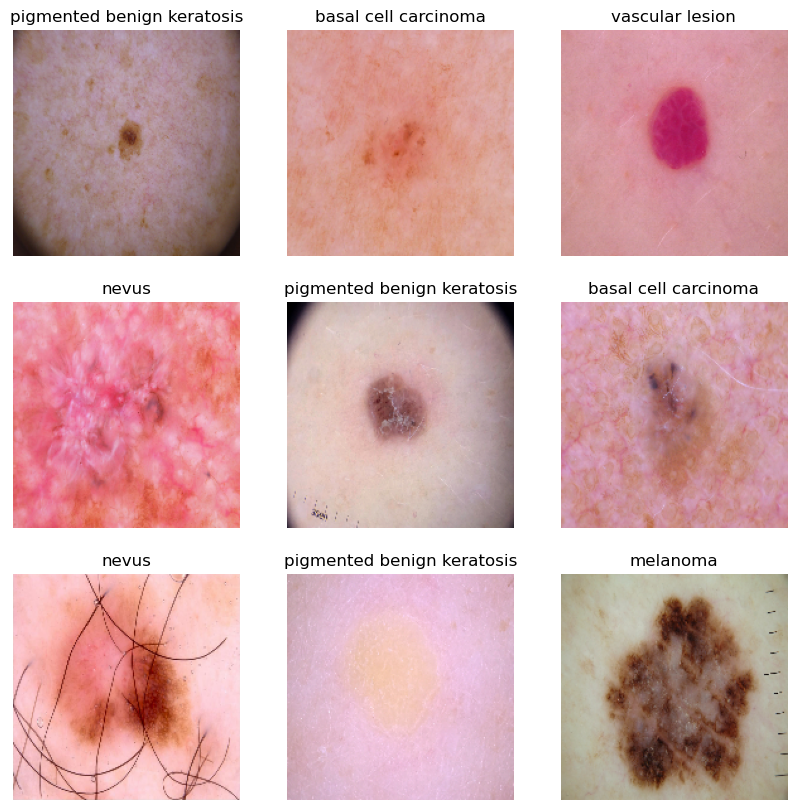

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [51]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [35]:
### Your code goes here
### Your code goes here
num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  #2D convolution layer (e.g. spatial convolution over images).
  layers.Conv2D(16, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
  layers.MaxPooling2D(),

  #We slide over the feature map and extract tiles of a specified size.
  layers.Conv2D(32, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),

  #We slide over the feature map and extract tiles of a specified size.
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
  layers.MaxPooling2D(),

  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  ##Flattens the input. Does not affect the batch size.
  layers.Flatten(),

  #fully connected layer
  #A hidden layer in which each node is connected to every node in the subsequent hidden layer.
  #A fully connected layer is also known as a dense layer.

  layers.Dense(128, activation='relu'),

  #Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
  #It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
  #Dense implements the operation: output = activation(dot(input, kernel)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes)
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [36]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [38]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 249ms/step - accuracy: 0.1868 - loss: 2.2049 - val_accuracy: 0.1739 - val_loss: 2.2225
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.4198 - loss: 1.6837 - val_accuracy: 0.2609 - val_loss: 2.3455
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 222ms/step - accuracy: 0.4123 - loss: 1.6463 - val_accuracy: 0.3043 - val_loss: 2.9665
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 231ms/step - accuracy: 0.5041 - loss: 1.3970 - val_accuracy: 0.2609 - val_loss: 2.2377
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 230ms/step - accuracy: 0.5316 - loss: 1.3186 - val_accuracy: 0.2174 - val_loss: 2.4959
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 225ms/step - accuracy: 0.5756 - loss: 1.2061 - val_accuracy: 0.2174 - val_loss: 2.7262
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.6131 - loss: 1.1127 - val_accuracy: 0.1304 - val_loss: 2.9672
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - accuracy: 0.6436 - loss: 1.0246 - val_accu

In [48]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.RandomCrop(img_height,img_width),
  ]
)

In [55]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Define the CNN model builder function
def build_model(hp):
    model = Sequential()
    
    # Image rescaling
    model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
    model.add(data_augmentation)
    # Tune the number of convolutional layers
    num_conv_layers = hp.Int('num_conv_layers', min_value=1, max_value=3, step=1)
    for i in range(num_conv_layers):
        model.add(layers.Conv2D(
            filters=hp.Int(f'conv_{i+1}_filters', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice(f'conv_{i+1}_kernel', values=[3, 5]),
            activation='relu',
            input_shape=(img_height, img_width, 3)  # Adjust according to your input image dimensions
        ))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())

    # Tune the number of units in the dense layer
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=32),
        activation='relu'
    ))

    # Tune the dropout rate
    model.add(layers.Dropout(
        rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    ))

    # Tune the output layer
    model.add(layers.Dense(9, activation='softmax'))

    # Tune the learning rate and optimizer
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [56]:
# Define hyperparameter search space
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=7,  # Adjust as needed
    directory='random_search',
    project_name='image_classification4'
)


Reloading Tuner from random_search\image_classification4\tuner0.json


In [57]:
# Perform hyperparameter search
tuner.search(train_ds, epochs=5, validation_data=val_ds)

Trial 7 Complete [00h 09m 40s]
val_accuracy: 0.17391304671764374

Best val_accuracy So Far: 0.260869562625885
Total elapsed time: 01h 55m 07s


In [58]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps}")

Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000001698B493910>


In [59]:
# Build the best model
best_model = tuner.hypermodel.build(best_hps)

In [29]:
# Print the best model's configuration
print("Best Model Configuration:")
print(best_model.summary())

Best Model Configuration:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 178, 178, 48)   │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 85, 85, 48)     │        57,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 42, 42, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 40, 40, 32)     │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 352)            │     4,505,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         3,177 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,581,977 (17.48 MB)

 Trainable params: 4,581,977 (17.48 MB)

 Non-trainable params: 0 (0.00 B)

None


In [60]:
epochs = 20
history = best_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.1830 - loss: 7.8218 - val_accuracy: 0.1304 - val_loss: 3.0934
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.2502 - loss: 2.3298 - val_accuracy: 0.1304 - val_loss: 2.2718
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.3166 - loss: 1.9077 - val_accuracy: 0.1739 - val_loss: 2.5503
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.3549 - loss: 1.8357 - val_accuracy: 0.2609 - val_loss: 2.3751
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.3507 - loss: 1.7545 - val_accuracy: 0.0870 - val_loss: 2.3331
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 152s 3s/step - accuracy: 0.3607 - loss: 1.7025 - val_accuracy: 0.2174 - val_loss: 2.5659
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.3880 - loss: 1.6874 - val_accuracy: 0.1304 - val_loss: 2.5800
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.3969 - loss: 1.6479 - val_accuracy: 0.2174 - v

### Visualizing training results

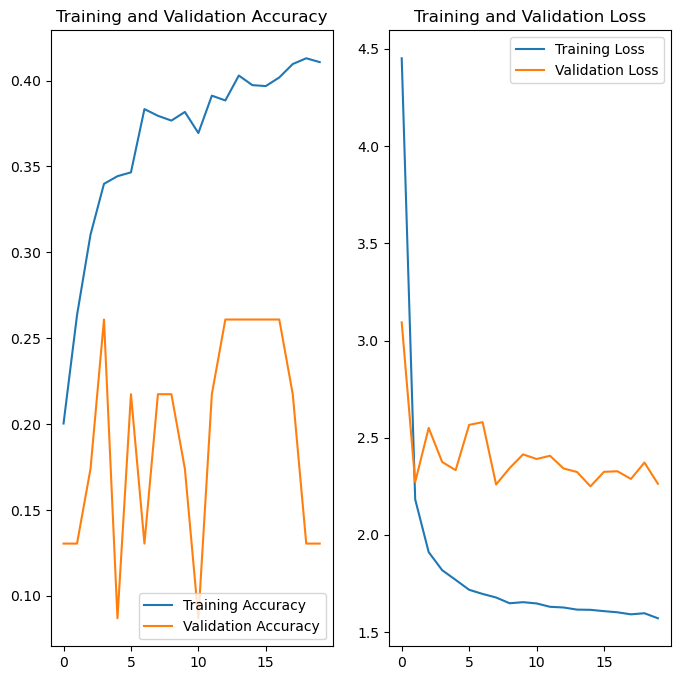

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



### Write your findings here

ANS - Model fit suggest there is a overfit of the model as hige difference in accuracy between training dataset and validation dataset. Also loss for training data set is decreasing but validation dataset is around 22.

In [52]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.RandomCrop(img_height,img_width),
  ]
)

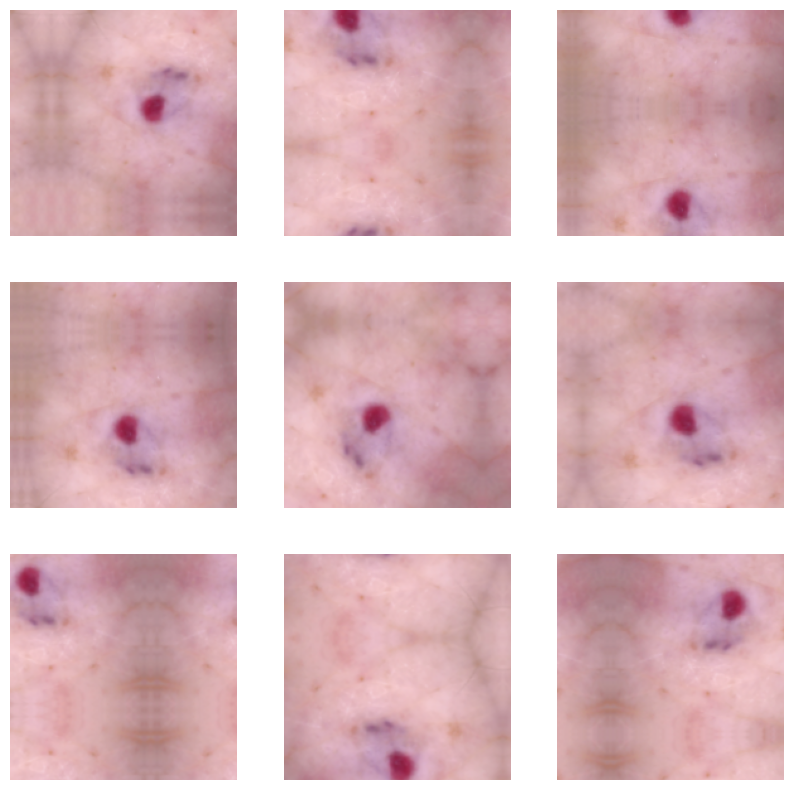

In [53]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [62]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model1 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(),

  #layers.Dropout(0.5),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #layers.Dropout(0.5),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  #layers.BatchNormalization(), 
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
  
])




### Compiling the model

In [63]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [64]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.1869 - loss: 2.3447 - val_accuracy: 0.1304 - val_loss: 3.4970
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.3262 - loss: 1.7860 - val_accuracy: 0.1739 - val_loss: 2.2168
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.3404 - loss: 1.7595 - val_accuracy: 0.1304 - val_loss: 2.2155
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.3578 - loss: 1.7484 - val_accuracy: 0.0870 - val_loss: 2.6156
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.3660 - loss: 1.6940 - val_accuracy: 0.1304 - val_loss: 2.6546
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.3841 - loss: 1.6509 - val_accuracy: 0.2609 - val_loss: 2.2597
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 565s 10s/step - accuracy: 0.3322 - loss: 1.7257 - val_accuracy: 0.3043 - val_loss: 2.0702
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.3780 - loss: 1.6358 - val_accuracy: 0.1739 - v

### Visualizing the results

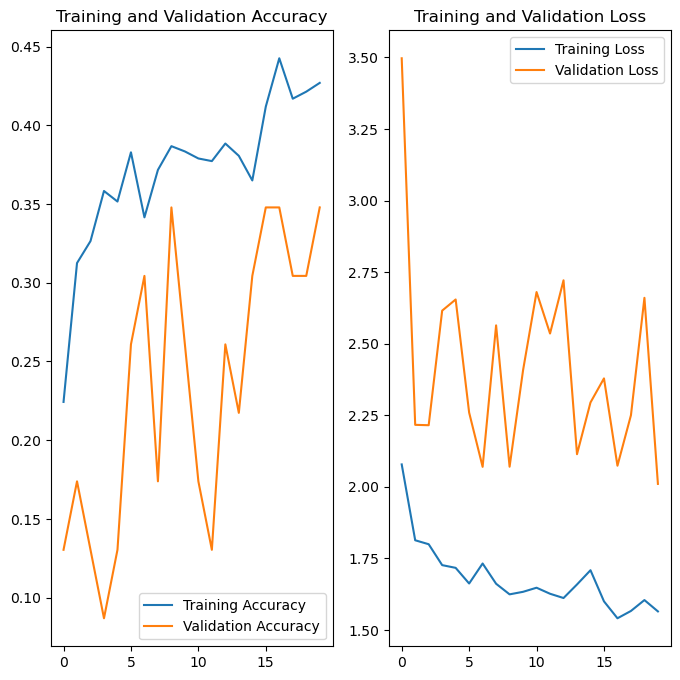

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [67]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setting batch size and image size
batch_size = 100
IMG_SHAPE = 224

# Create training images generator
#Generate batches of tensor image data with real-time data augmentation.
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
#https://keras.io/api/preprocessing/image/
#Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=path_to_train_directory,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

# Create validation images generator
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=path_to_test_directory,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [68]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model1.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=epochs
)

Epoch 1/20


C:\Users\NishthaS\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 301s 12s/step - accuracy: 0.1694 - loss: 9.3341 - val_accuracy: 0.1356 - val_loss: 2.1796
Epoch 2/20
 1/23 ━━━━━━━━━━━━━━━━━━━━ 18:50 51s/step - accuracy: 0.1300 - loss: 2.1562

KeyboardInterrupt: 

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

After adding dropout overfit has recuded but loss is still high for both validation and training datset

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
datapath = r'/content/gdrive/MyDrive/Train/actinic keratosis'
import Augmentor
p = Augmentor.Pipeline(datapath)
#Every function requires you to specify a probability, which is used to decide if an operation is applied to an image as it is passed through the augmentation pipeline.
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p.zoom(probability=0.2, min_factor=1.1, max_factor=1.2)
p.sample(300)
p.process()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? Ans - class 6 has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples? Ans - Class 5 dominates the samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [66]:
!pip install Augmentor

  Obtaining dependency information for Augmentor from https://files.pythonhosted.org/packages/f3/86/5a91176650eb229ea2cd95551c34c36fba6cd95da3bdc4a5c73fbb1536ca/Augmentor-0.2.12-py2.py3-none-any.whl.metadata


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [74]:
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(r"C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train")
data_dir_test = pathlib.Path(r"C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Test")

In [75]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [76]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [77]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN...,actinic keratosis
1,C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN...,actinic keratosis
2,C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN...,actinic keratosis
3,C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN...,actinic keratosis
4,C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN...,actinic keratosis
...,...,...
2234,C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN...,vascular lesion
2235,C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN...,vascular lesion
2236,C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN...,vascular lesion
2237,C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


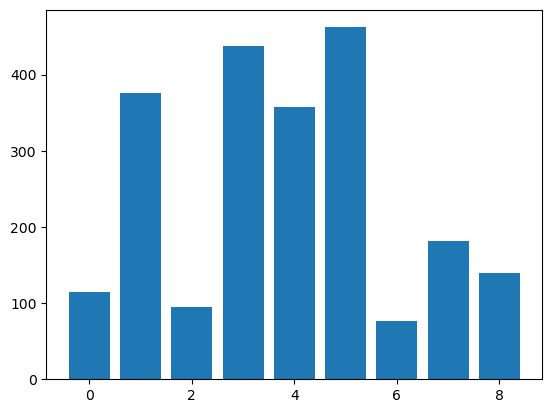

In [78]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [81]:
path_to_training_dataset=r"C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train\\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16BA852A550>: 100%|██████████| 500/500 [00:04<00:00, 111.51 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train\\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16B9FCF70D0>: 100%|██████████| 500/500 [00:04<00:00, 115.31 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train\\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16BA2068D50>: 100%|██████████| 500/500 [00:04<00:00, 107.02 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train\\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x16BAA7C0510>: 100%|██████████| 500/500 [00:36<00:00, 13.78 Samples/s] 


Initialised with 357 image(s) found.
Output directory set to C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train\\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x16B9FE8DCD0>: 100%|██████████| 500/500 [00:26<00:00, 18.88 Samples/s]  


Initialised with 462 image(s) found.
Output directory set to C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train\\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16BA22BB8D0>: 100%|██████████| 500/500 [00:06<00:00, 76.91 Samples/s]                   


Initialised with 77 image(s) found.
Output directory set to C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train\\seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x16BA86BAB10>: 100%|██████████| 500/500 [00:15<00:00, 31.92 Samples/s]


Initialised with 181 image(s) found.
Output directory set to C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train\\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16BA8697F90>: 100%|██████████| 500/500 [00:06<00:00, 72.43 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:\Users\NishthaS\Documents\Cnn_assignemnt\CNN_assignment\Skin_cancer\Train\\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x16BA854E810>: 100%|██████████| 500/500 [00:07<00:00, 70.50 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [82]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [86]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\NishthaS\\Documents\\Cnn_assignemnt\\CNN_assignment\\Skin_cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0a6be7f7-af8e-4127-a7a6-a7a9811acfa0.jpg',
 'C:\\Users\\NishthaS\\Documents\\Cnn_assignemnt\\CNN_assignment\\Skin_cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_42b23b12-34d6-4fea-b975-16c0375d13ba.jpg',
 'C:\\Users\\NishthaS\\Documents\\Cnn_assignemnt\\CNN_assignment\\Skin_cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_ae00aa5d-6804-4e50-b4a3-d920ed9d77c0.jpg',
 'C:\\Users\\NishthaS\\Documents\\Cnn_assignemnt\\CNN_assignment\\Skin_cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f436c475-7a63-4077-a4d0-b2cb88c5bde9.jpg',
 'C:\\Users\\NishthaS\\Documents\\Cnn_assignemnt\\CNN_assignment\\Skin_cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_f5576c48-75bc-421e-8170-6f26f44f598f.jpg',


In [87]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [88]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [89]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\NishthaS\AppData\Local\Temp\ipykernel_21268\390629722.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [90]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [91]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [109]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [110]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [111]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [112]:
#overlaps data preprocessing and model execution while training., Speed up training
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [113]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

num_classes = 9

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor
model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  #layers.Dropout(0.5),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  #layers.Dropout(0.5),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(), 
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
  
])

In [114]:
# View the summary of all layers
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,025,289 (30.61 MB)

 Trainable params: 8,024,841 (30.61 MB)

 Non-trainable params: 448 (1.75 KB)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [115]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [116]:
epochs = 30
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 310s 2s/step - accuracy: 0.1979 - loss: 5.4568 - val_accuracy: 0.0987 - val_loss: 14.6669
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.2499 - loss: 1.9658 - val_accuracy: 0.1128 - val_loss: 6.6128
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.3057 - loss: 1.8371 - val_accuracy: 0.2435 - val_loss: 2.1731
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.3191 - loss: 1.7629 - val_accuracy: 0.2480 - val_loss: 2.1711
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.3514 - loss: 1.6777 - val_accuracy: 0.2895 - val_loss: 1.8426
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 845s 5s/step - accuracy: 0.3417 - loss: 1.6369 - val_accuracy: 0.3363 - val_loss: 1.8671
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.3471 - loss: 1.6053 - val_accuracy: 0.3742 - val_loss: 1.4964
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.3753 - loss: 1.5416 - val_acc

#### **Todo:**  Visualize the model results

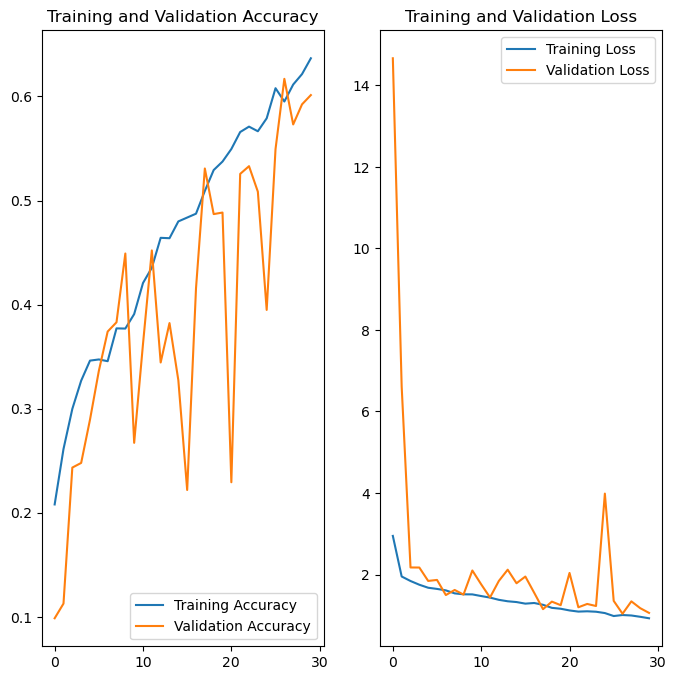

In [117]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Yes, after adding batch_normalization and dropouts overfitting problem was resolved. Also adding more samples to handle class imbalance added in the improvement of accuracy.
Accuracy could have improved by hyperparameter code which i have added but due to limitation of computation it was taking longer to train the model with right parameters.
If computation could have been better i would have tried huperparameterization and found out the best model with good accuracy.